Libraries

In [78]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import wandb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense
from wandb.keras import WandbCallback

Init _WANDB_ Project

In [99]:
wandb.init(project="Weather Prediction")

epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,999
loss,2.96248


In [81]:
config = wandb.config
config.learning_rate = 0.00003

Read Data

In [82]:
weather_dataset = pd.read_csv("E:\programming\PyLearn-SajjadAemmi\Assignment41\exercise_MLP_Regression\Weather-Prediction\data\weatherHistory.csv")
weather_dataset.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


Preprocessign Data

In [83]:
weather_dataset['Formatted Date'] = pd.to_datetime(weather_dataset['Formatted Date'], utc=True)
weather_dataset['Year'] = weather_dataset['Formatted Date'].dt.year
weather_dataset['Day'] = weather_dataset['Formatted Date'].dt.dayofyear
weather_dataset.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Day
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,90
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,90
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,91
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,91
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,91


In [84]:
weather_dataset_improved = weather_dataset.groupby(['Year', 'Day'])['Temperature (C)'].sum().reset_index()
weather_dataset_improved.head()

,Year,Day,Temperature (C)
0,2005,365,0.577778
1,2006,1,97.800000
2,2006,2,126.316667
3,2006,3,56.172222
4,2006,4,54.044444


In [85]:
weather_dataset_improved['Temperature (C)'] = weather_dataset_improved['Temperature (C)'] / 24
weather_dataset_improved.head()

,Year,Day,Temperature (C)
0,2005,365,0.024074
1,2006,1,4.075000
2,2006,2,5.263194
3,2006,3,2.340509
4,2006,4,2.251852


Show Data with _Matplotlib_

Text(0, 0.5, 'Temperature (C)')

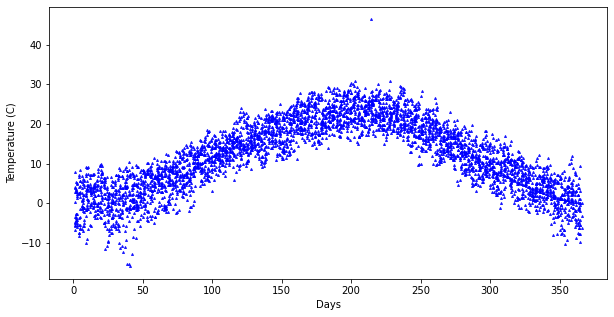

In [86]:
plt.figure(figsize=(10, 5))
plt.scatter(weather_dataset_improved['Day'], weather_dataset_improved['Temperature (C)'], marker='^', c='blue', s=4, alpha=0.8)
plt.xlabel('Days')
plt.ylabel('Temperature (C)')

Normalize

In [87]:
# temp_scaler = StandardScaler()
# temp_scaler.fit(weather_dataset_improved['Temperature (C)'].values.reshape(-1,1))

# weather_dataset_improved['Temperature (C)'] = temp_scaler.transform(weather_dataset_improved['Temperature (C)'].values.reshape(-1,1))

In [88]:
year_scaler = StandardScaler()
year_scaler.fit(weather_dataset_improved['Year'].values.reshape(-1,1))

weather_dataset_improved['Year'] = year_scaler.transform(weather_dataset_improved['Year'].values.reshape(-1,1))

In [89]:
day_scaler = StandardScaler()
day_scaler.fit(weather_dataset_improved['Day'].values.reshape(-1,1))

weather_dataset_improved['Day'] = day_scaler.transform(weather_dataset_improved['Day'].values.reshape(-1,1))

In [90]:
weather_dataset_improved.head(10)

,Year,Day,Temperature (C)
0,-1.896399,1.723866,0.024074
1,-1.580293,-1.727315,4.075000
2,-1.580293,-1.717834,5.263194
3,-1.580293,-1.708353,2.340509
4,-1.580293,-1.698872,2.251852
5,-1.580293,-1.689390,2.703935
6,-1.580293,-1.679909,2.550463
7,-1.580293,-1.670428,0.877083
8,-1.580293,-1.660946,-1.231713
9,-1.580293,-1.651465,-1.693287


Text(0, 0.5, 'Temperature (C)')

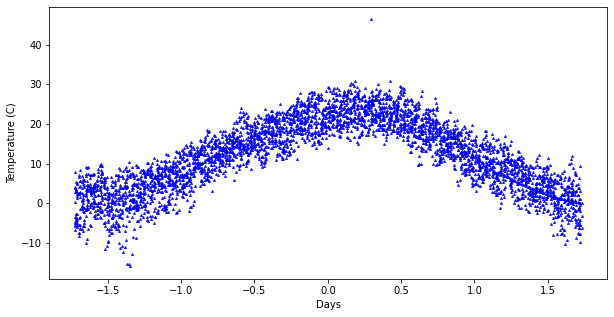

In [91]:
plt.figure(figsize=(10, 5))
plt.scatter(weather_dataset_improved['Day'], weather_dataset_improved['Temperature (C)'], marker='^', c='blue', s=4, alpha=0.8)
plt.xlabel('Days')
plt.ylabel('Temperature (C)')

Create X and Y data

In [92]:
X = weather_dataset_improved[['Year', 'Day']].values
Y = weather_dataset_improved['Temperature (C)'].values

# X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

print(X.shape, Y.shape)

(4019, 2) (4019, 1)


Split Datas

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=33)

Model

In [94]:
model = tf.keras.models.Sequential([
    Dense(128, input_dim=2, activation='sigmoid'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='linear')
])

In [95]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=config.learning_rate), # 0.00003
    loss=tf.keras.losses.MeanAbsoluteError()
)

Model Summary

In [96]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 128)               384       
                                                                 
 dense_68 (Dense)            (None, 256)               33024     
                                                                 
 dense_69 (Dense)            (None, 128)               32896     
                                                                 
 dense_70 (Dense)            (None, 128)               16512     
                                                                 
 dense_71 (Dense)            (None, 64)                8256      
                                                                 
 dense_72 (Dense)            (None, 32)                2080      
                                                                 
 dense_73 (Dense)            (None, 8)               

Train

In [97]:
model.fit(X_train, Y_train, epochs=1000, callbacks=[WandbCallback()])

Epoch 1/1000
101/101 [==============================] - 1s 3ms/step - loss: 11.9970
Epoch 2/1000
101/101 [==============================] - 0s 2ms/step - loss: 10.2350
Epoch 3/1000
101/101 [==============================] - 0s 4ms/step - loss: 7.9839
Epoch 4/1000
101/101 [==============================] - 0s 3ms/step - loss: 7.4473
Epoch 5/1000
101/101 [==============================] - 0s 3ms/step - loss: 7.4260
Epoch 6/1000
101/101 [==============================] - 0s 3ms/step - loss: 7.4230
Epoch 7/1000
101/101 [==============================] - 0s 3ms/step - loss: 7.4054
Epoch 8/1000
101/101 [==============================] - 0s 3ms/step - loss: 7.3938
Epoch 9/1000
101/101 [==============================] - 0s 3ms/step - loss: 7.3794
Epoch 10/1000
101/101 [==============================] - 0s 3ms/step - loss: 7.3659
Epoch 11/1000
101/101 [==============================] - 0s 3ms/step - loss: 7.3439
Epoch 12/1000
101/101 [==============================] - 0s 4ms/step - loss: 7.3180

Evaluate

In [98]:
model.evaluate(X_test, Y_test)

26/26 [==============================] - 0s 1ms/step - loss: 2.9031


2.903113603591919

Predict

In [ ]:
# example_day = ([[]])

# model.predict(example_day)